In [ ]:
import timm
import torch
from fastai.vision.all import *
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from timm.data.transforms_factory import create_transform

## Download Data

In [ ]:
# Download and extract the dataset
path = untar_data(URLs.PETS)

# Check the folder structure
path.ls()
pets_image_files = get_image_files(path/"images")

In [ ]:
path = untar_data(URLs.IMAGENETTE)

# Check the folder structure
path.ls()
imagenette_files = get_image_files(path/"images")

## Models

In [ ]:
timm.list_models('resnet*', pretrained=True)

['resnet10t.c3_in1k',
 'resnet14t.c3_in1k',
 'resnet18.a1_in1k',
 'resnet18.a2_in1k',
 'resnet18.a3_in1k',
 'resnet18.fb_ssl_yfcc100m_ft_in1k',
 'resnet18.fb_swsl_ig1b_ft_in1k',
 'resnet18.gluon_in1k',
 'resnet18.tv_in1k',
 'resnet18d.ra2_in1k',
 'resnet18d.ra4_e3600_r224_in1k',
 'resnet26.bt_in1k',
 'resnet26d.bt_in1k',
 'resnet26t.ra2_in1k',
 'resnet32ts.ra2_in1k',
 'resnet33ts.ra2_in1k',
 'resnet34.a1_in1k',
 'resnet34.a2_in1k',
 'resnet34.a3_in1k',
 'resnet34.bt_in1k',
 'resnet34.gluon_in1k',
 'resnet34.ra4_e3600_r224_in1k',
 'resnet34.tv_in1k',
 'resnet34d.ra2_in1k',
 'resnet50.a1_in1k',
 'resnet50.a1h_in1k',
 'resnet50.a2_in1k',
 'resnet50.a3_in1k',
 'resnet50.am_in1k',
 'resnet50.b1k_in1k',
 'resnet50.b2k_in1k',
 'resnet50.bt_in1k',
 'resnet50.c1_in1k',
 'resnet50.c2_in1k',
 'resnet50.d_in1k',
 'resnet50.fb_ssl_yfcc100m_ft_in1k',
 'resnet50.fb_swsl_ig1b_ft_in1k',
 'resnet50.gluon_in1k',
 'resnet50.ra_in1k',
 'resnet50.ram_in1k',
 'resnet50.tv2_in1k',
 'resnet50.tv_in1k',
 'resne

### General Usage

In [ ]:
pets_image_paths = list([Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')])
pets_image_paths

[Path('/root/.fastai/data/oxford-iiit-pet/annotations'),
 Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
model = timm.create_model('resnet50d', pretrained=True)
model

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/103M [00:00<?, ?B/s]

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Co

In [ ]:
model.default_cfg

{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth',
 'hf_hub_id': 'timm/resnet50d.ra2_in1k',
 'architecture': 'resnet50d',
 'tag': 'ra2_in1k',
 'custom_load': False,
 'input_size': (3, 224, 224),
 'test_input_size': (3, 288, 288),
 'fixed_input_size': False,
 'interpolation': 'bicubic',
 'crop_pct': 0.875,
 'test_crop_pct': 0.95,
 'crop_mode': 'center',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'num_classes': 1000,
 'pool_size': (7, 7),
 'first_conv': 'conv1.0',
 'classifier': 'fc',
 'origin_url': 'https://github.com/huggingface/pytorch-image-models'}

In [ ]:
m = timm.create_model('resnet50d', pretrained=True, in_chans=1)

# single channel image
x = torch.randn(1, 1, 224, 224)

m(x).shape

torch.Size([1, 1000])

### Customizing models

In [ ]:
model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [ ]:
model.get_classifier()

Linear(in_features=2048, out_features=1000, bias=True)

If we would like to avoid creating the last layer completely, we can set the number of classes equal to 0, which will create a model with the identity function as the final layer; this can be useful for inspecting the output of penultimate layer.

In [ ]:
timm.create_model('resnet50d', pretrained=True, num_classes=0).get_classifier()

### Global Pooling options
- avg: Average pooling
- max: Max pooling
- avgmax: the sum of average and max pooling, re-scaled by 0.5
- catavgmax: a concatenation of the outputs of average and max pooling along feature dimension. Note that this will double the feature dimension.
- '': No pooling is used, the pooling layer is replaced by an Identity operation

In [ ]:
pool_types = ['avg', 'max', 'avgmax', 'catavgmax', '']

for pool in pool_types:
    model = timm.create_model('resnet50d', pretrained=True, num_classes=0, global_pool=pool)
    model.eval()
    feature_output = model(torch.randn(1, 3, 224, 224))
    print(feature_output.shape)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/103M [00:00<?, ?B/s]

torch.Size([1, 2048])
torch.Size([1, 2048])
torch.Size([1, 2048])
torch.Size([1, 4096])
torch.Size([1, 2048, 7, 7])


### Modifying an existing model

In [ ]:
m = timm.create_model('resnet50d', pretrained=True)

print(f'Original pooling: {m.global_pool}')
print(f'Original classifier: {m.get_classifier()}')
print('--------------------')

m.reset_classifier(10, 'max')

print(f'Modified pooling: {m.global_pool}')
print(f'Modified classifier: {m.get_classifier()}')

Original pooling: SelectAdaptivePool2d(pool_type=avg, flatten=Flatten(start_dim=1, end_dim=-1))
Original classifier: Linear(in_features=2048, out_features=1000, bias=True)
--------------------
Modified pooling: SelectAdaptivePool2d(pool_type=max, flatten=Flatten(start_dim=1, end_dim=-1))
Modified classifier: Linear(in_features=2048, out_features=10, bias=True)


##### Creating a new classification head

In [ ]:
model = timm.create_model('resnet50d', pretrained=True, num_classes=10, global_pool='catavgmax')

In [ ]:
num_in_features = model.get_classifier().in_features
num_in_features

4096

In [ ]:
from torch import nn
model.fc = nn.Sequential(
    nn.BatchNorm1d(num_in_features),
    nn.Linear(in_features=num_in_features, out_features=512, bias=False),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Dropout(0.4),
    nn.Linear(in_features=512, out_features=10, bias=False))

In [ ]:
model.eval()
model(torch.randn(1, 3, 224, 224)).shape

torch.Size([1, 10])

## Feature Extraction

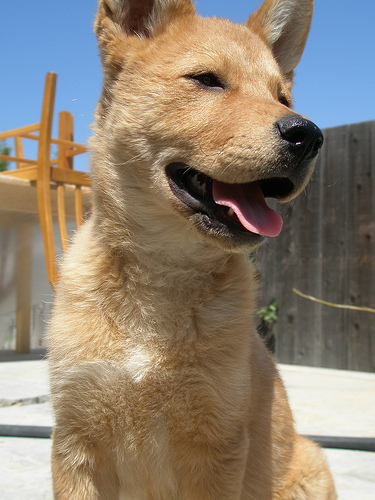

In [ ]:
# Pick the first image
image = Image.open(pets_image_files[1])
image

In [ ]:
image = torch.as_tensor(np.array(image, dtype=np.float32)).transpose(2, 0)[None]

In [ ]:
model = timm.create_model('resnet50d', pretrained=True)
model.default_cfg

{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth',
 'hf_hub_id': 'timm/resnet50d.ra2_in1k',
 'architecture': 'resnet50d',
 'tag': 'ra2_in1k',
 'custom_load': False,
 'input_size': (3, 224, 224),
 'test_input_size': (3, 288, 288),
 'fixed_input_size': False,
 'interpolation': 'bicubic',
 'crop_pct': 0.875,
 'test_crop_pct': 0.95,
 'crop_mode': 'center',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'num_classes': 1000,
 'pool_size': (7, 7),
 'first_conv': 'conv1.0',
 'classifier': 'fc',
 'origin_url': 'https://github.com/huggingface/pytorch-image-models'}

use the forward_features method to bypass the global pooling and classification layers.

In [ ]:
def visualise_feature_output(t):
    plt.imshow(feature_output[0].transpose(0, 2).sum(-1).detach().numpy())
    plt.show()

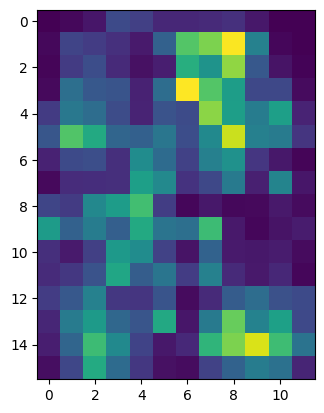

In [ ]:
feature_output = model.forward_features(image)
visualise_feature_output(feature_output)

### Multiple feature outputs

timm also provides functionality which enables us to use models as feature backbones that output feature maps for selected levels.

In [ ]:
model = timm.create_model('resnet50d', pretrained=True, features_only=True)
print(model.feature_info.module_name())
print(model.feature_info.reduction())
print(model.feature_info.channels())

['act1', 'layer1', 'layer2', 'layer3', 'layer4']
[2, 4, 8, 16, 32]
[64, 256, 512, 1024, 2048]


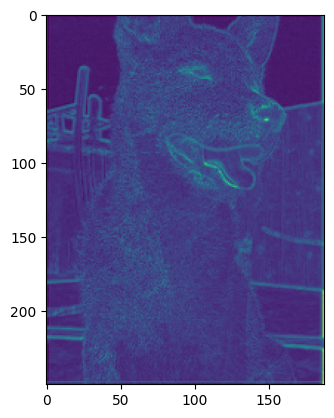

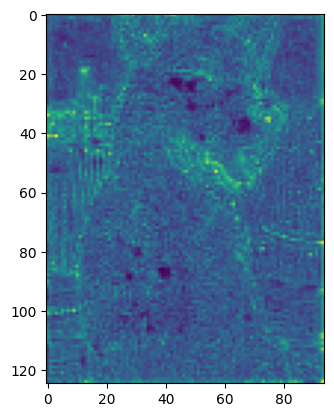

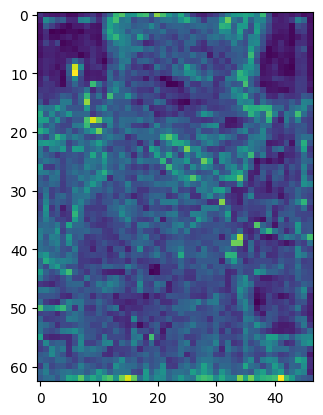

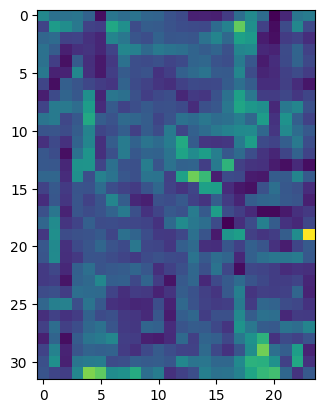

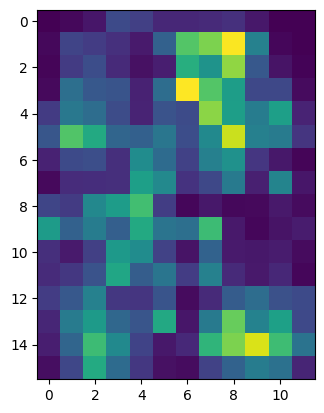

In [ ]:
out = model(image)
for o in out:
    plt.imshow(o[0].transpose(0, 2).sum(-1).detach().numpy())
    plt.show()

### Using FX
TorchVision recently released a new utility called FX, which makes it easier to access intermediate transformations of an input during the forward pass of a PyTorch Module. This is done by symbolically tracing the forward method to produce a graph where each node represents a single operation. As nodes are given human-readable names, it is easy specify exactly which nodes we want to access. FX is described in more detail in the docs and in this blog post.

Note: At the time of writing, dynamic control flow can’t yet be represented in terms of a static graph when using FX.

As almost all models in timm are symbolically traceable, we can use FX to manipulate these. Let's explore how we can use FX to extract features from timm models.

In [ ]:
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor

In [ ]:
model = timm.create_model('resnet50d', pretrained=True, exportable=True)
nodes, _ = get_graph_node_names(model)

nodes[1:5]

['conv1.0', 'conv1.1', 'conv1.2', 'conv1.3']

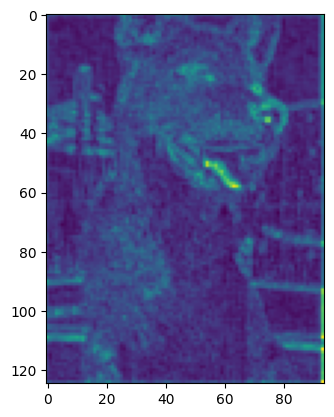

In [ ]:
features = {'layer1.0.act2': 'out'}
feature_extractor = create_feature_extractor(model, return_nodes=features)

out = feature_extractor(image)
plt.imshow(out['out'][0].transpose(0, 2).sum(-1).detach().numpy())

### Exporting to different formats
https://gist.github.com/Chris-hughes10/a9e5ec2cd7e7736c651bf89b5484b4a9

- Exporting to TorchScript
- Exporting to ONNX

## Data Augmentation

In [ ]:
create_transform(224,)

Compose(
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    MaybeToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

In [ ]:
create_transform(224, is_training=True)

Compose(
    RandomResizedCropAndInterpolation(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
    RandomHorizontalFlip(p=0.5)
    ColorJitter(brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4), hue=None)
    MaybeToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

In [ ]:
image = Image.open(pets_image_files[1])

from timm.data.transforms import RandomResizedCropAndInterpolation

tfm = RandomResizedCropAndInterpolation(size=350, interpolation='random')

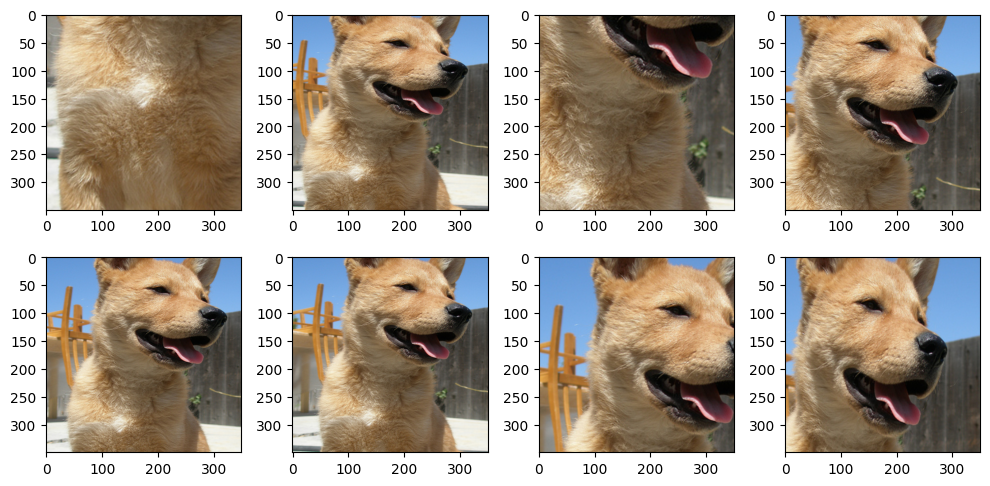

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize=(10, 5))

for idx, im in enumerate([tfm(image) for i in range(4)]):
    ax[0, idx].imshow(im)

for idx, im in enumerate([tfm(image) for i in range(4)]):
    ax[1, idx].imshow(im)

fig.tight_layout()
plt.show()

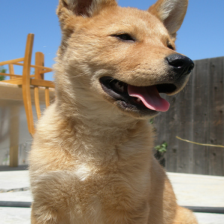

In [ ]:
tfm = RandomResizedCropAndInterpolation(size=224, scale=(0.8, 1))
tfm(image)

#### RandAugment

In [ ]:
from timm.data.auto_augment import rand_augment_transform

tfm = rand_augment_transform(
    config_str='rand-m9-mstd0.5',
    hparams={'img_mean': (124, 116, 104)}
)

tfm

RandAugment(n=2, ops=
	AugmentOp(name=AutoContrast, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Equalize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Invert, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Rotate, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Posterize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Solarize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=SolarizeAdd, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Color, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Contrast, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Brightness, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Sharpness, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ShearX, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ShearY, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=TranslateXRel, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=TranslateYRel, p=0.5, m=9, mstd=0.5))

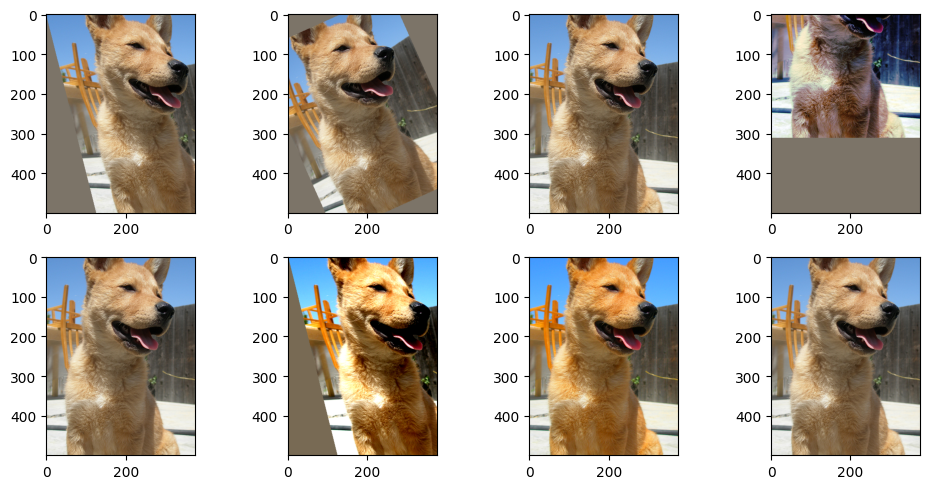

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize=(10, 5))

for idx, im in enumerate([tfm(image) for i in range(4)]):
    ax[0, idx].imshow(im)

for idx, im in enumerate([tfm(image) for i in range(4)]):
    ax[1, idx].imshow(im)

fig.tight_layout()
plt.show()

#### CutMix and Mixup

- Mixup: trộn toàn bộ ảnh + nhãn theo tỷ lệ → giúp generalization nhưng ảnh bị mờ.
- CutMix: cắt-dán vùng ảnh + nhãn theo diện tích → giữ chi tiết tốt, thường mạnh hơn.


Khi dùng **CutMix**, đúng là có rủi ro:

* Nếu vùng cắt **không chứa đối tượng chính**, thì mô hình có thể bị học sai, vì nhãn vẫn bị pha trộn nhưng ảnh không phản ánh đủ.
* Ví dụ: Ảnh mèo (chiếm giữa ảnh), ta cắt một miếng nhỏ ở góc không có mèo và dán từ ảnh chó vào → nhãn = \[0.7 mèo, 0.3 chó], nhưng vùng chó dán vào lại **không chứa thông tin quan trọng**.

---

### 1. Nghiên cứu gốc về CutMix

Trong paper **CutMix: Regularization Strategy to Train Strong Classifiers with Localizable Features (Yun et al. 2019)**, nhóm tác giả cũng đề cập đến vấn đề này. Họ chứng minh rằng:

* Ngay cả khi patch không cắt đúng đối tượng, thì việc “ép” mô hình học từ **cả background + object context** vẫn hữu ích.
* Lý do: Dữ liệu được đa dạng hóa, mô hình phải học **khả năng chịu nhiễu** và **generalize** tốt hơn.
* Ngoài ra, khi lấy mẫu patch **ngẫu nhiên**, theo thống kê thì nhiều lần huấn luyện sẽ có cả trường hợp patch chứa object chính.

---

### 2. Các cải tiến (Fix cho nhược điểm này)

Có nhiều biến thể cải tiến để giảm rủi ro **cắt sai chỗ**:

* **Attentive CutMix**: dùng attention map (ví dụ Grad-CAM) để cắt vùng quan trọng thay vì ngẫu nhiên.
* **Saliency Mix**: chọn vùng có đối tượng nổi bật (saliency detection).
* **Guided CutMix**: dùng bounding box hoặc segmentation để cắt đúng đối tượng.
* **PuzzleMix**: dùng optimal transport để chọn vùng cắt tối ưu.

Những biến thể này phức tạp hơn, nhưng có thể cải thiện hiệu suất trên các dataset nhạy cảm (như medical images).



In [ ]:
from timm.data import ImageDataset
from torch.utils.data import DataLoader

def create_dataloader_iterator():
    dataset = ImageDataset(path/"images", transform=create_transform(224))
    dl = iter(DataLoader(dataset, batch_size=2))
    return dl

In [ ]:
dataloader = create_dataloader_iterator()
inputs, classes = next(dataloader)

In [ ]:
# Taken from timmdocs https://fastai.github.io/timmdocs/mixup_cutmix

import numpy as np
import matplotlib.pyplot as plt

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

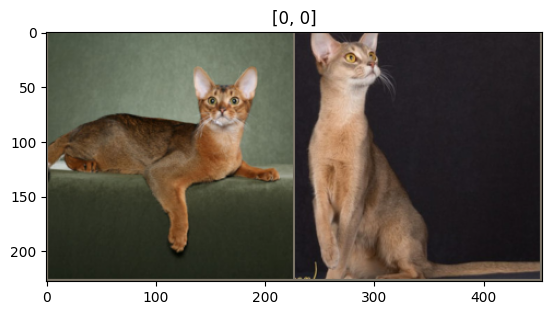

In [ ]:
import torchvision

out = torchvision.utils.make_grid(inputs)
imshow(out, title=[x.item() for x in classes])

In [ ]:
from timm.data.mixup import Mixup

mixup_args = {
    'mixup_alpha': 1.,
    'cutmix_alpha': 1.,
    'prob': 1,
    'switch_prob': 0.5,
    'mode': 'batch',
    'label_smoothing': 0.1,
    'num_classes': 2}

mixup_fn = Mixup(**mixup_args)

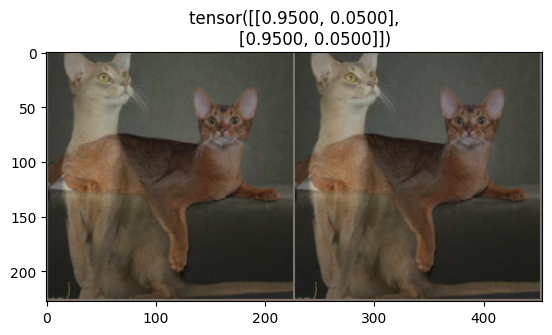

In [ ]:
# Mixup trên CPU
mixed_inputs, mixed_classes = mixup_fn(inputs, classes)

# Ghép ảnh thành grid
out = torchvision.utils.make_grid(mixed_inputs)

# Hiển thị
imshow(out, title=mixed_classes)

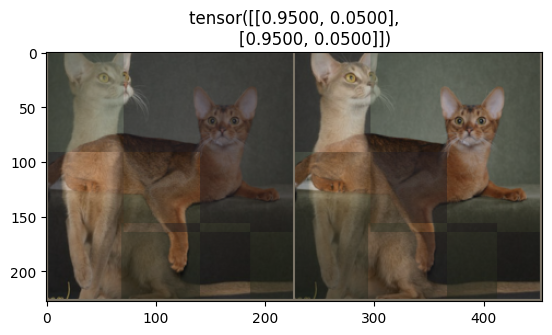

In [ ]:
mixed_inputs, mixed_classes = mixup_fn(inputs, classes)
out = torchvision.utils.make_grid(mixed_inputs)
imshow(out, title=mixed_classes)

## Datasets

In [ ]:
from timm.data import create_dataset

### Loading datasets from TorchVision

To load a dataset included with TorchVision, we simply specify the prefix torch/ before the name of the dataset that we wish to load. If the data doesn't exist on the file system, we can download this data by setting download=True. Additionally, here we are specifying that we would like to load the training dataset with the split argument.

In [ ]:
ds = create_dataset('torch/cifar10', 'cifar10', download=True, split='train')
ds, type(ds)

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: cifar10
     Split: Train,
 torchvision.datasets.cifar.CIFAR10)

In [ ]:
ds[0]

(<PIL.Image.Image image mode=RGB size=32x32>, 6)

### Loading datasets from TensorFlow Datasets

In [ ]:
ds = create_dataset('tfds/beans', 'beans', download=True, split='train[:10%]', batch_size=2, is_training=True)
ds

In [ ]:
ds_iter = iter(ds)

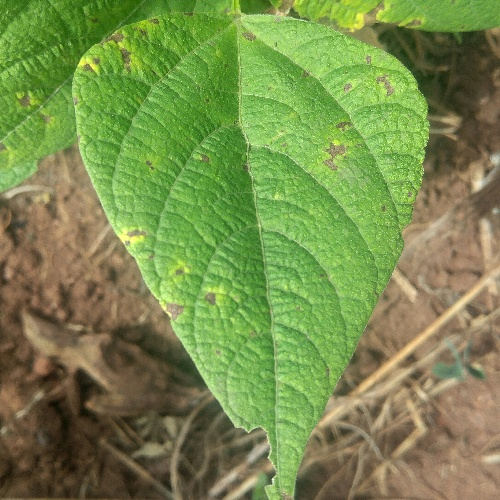

In [ ]:
image, label = next(ds_iter)
image

### Loading data from local folders

In [ ]:
from timm.data.transforms_factory import create_transform

In [ ]:
imagenette_path = untar_data(URLs.IMAGENETTE)
ds = create_dataset(name='', root=str(imagenette_path/"train"), transform=create_transform(224))

image, label = ds[0]
image.shape

torch.Size([3, 224, 224])

#### ImageDataset Class

In [ ]:
from pathlib import Path
from timm.data import ImageDataset

In [ ]:
imagenette_ds = ImageDataset(str(imagenette_path/"train"))
len(imagenette_ds)

In [ ]:
imagenette_ds.parser

In [ ]:
imagenette_ds.parser.class_to_idx

## Optimizers

In [1]:
import inspect

import timm.optim

[cls_name for cls_name, cls_obj in inspect.getmembers(timm.optim) if inspect.isclass(cls_obj) if cls_name !='Lookahead']

['AdaBelief',
 'Adadelta',
 'Adafactor',
 'AdafactorBigVision',
 'Adagrad',
 'Adahessian',
 'Adam',
 'AdamP',
 'AdamW',
 'AdamWLegacy',
 'Adamax',
 'Adan',
 'Adopt',
 'LaProp',
 'Lamb',
 'Lars',
 'Lion',
 'MADGRAD',
 'Mars',
 'NAdam',
 'NAdamLegacy',
 'NAdamW',
 'NvNovoGrad',
 'OptimInfo',
 'OptimizerRegistry',
 'RAdam',
 'RAdamLegacy',
 'RMSprop',
 'RMSpropTF',
 'SGD',
 'SGDP',
 'SGDW']

In [2]:
import torch

model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
    torch.nn.Flatten(0, 1)
)

optimizer = timm.optim.create_optimizer_v2(model, opt='sgd', lr=0.01, momentum=0.8); optimizer, type(optimizer)


(SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0.8
     nesterov: True
     weight_decay: 0.0
 ),
 torch.optim.sgd.SGD)

In [3]:
optimizer = timm.optim.create_optimizer_v2(model,
                                           opt='lamb',
                                           lr=0.01,
                                           weight_decay=0.01)

optimizer, type(optimizer)

(Lamb (
 Parameter Group 0
     always_adapt: False
     betas: (0.9, 0.999)
     bias_correction: True
     caution: False
     corrected_weight_decay: False
     decoupled_decay: False
     eps: 1e-06
     grad_averaging: True
     lr: 0.01
     max_grad_norm: 1.0
     trust_clip: False
     weight_decay: 0.0
 
 Parameter Group 1
     always_adapt: False
     betas: (0.9, 0.999)
     bias_correction: True
     caution: False
     corrected_weight_decay: False
     decoupled_decay: False
     eps: 1e-06
     grad_averaging: True
     lr: 0.01
     max_grad_norm: 1.0
     trust_clip: False
     weight_decay: 0.01
 ),
 timm.optim.lamb.Lamb)

#### Lookahead

In [5]:
optimizer = timm.optim.create_optimizer_v2(model.parameters(), opt='lookahead_adam', lr=0.01)
optimizer.sync_lookahead()

### Schedulers

## Exponential Moving Average Model